Questions I'm looking to answer:

1. Are there any notable trends in recent years' popular songs? (so 5 years or so)

2. How well is Adele doing compared to other singers in 2020? (Adele is my favourite singer)

3. What's the difference between Adele and her top competitors?


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring the dataset first

In [2]:
data_df = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data.csv')

In [3]:
data_df.shape

(170653, 19)

In [4]:
data_df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

Checking for missing values (If any)

In [5]:
data_df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
data_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [ ]:
df = pd.DataFrame({'A': [1, 2, 3, 4],'B': [[1, 2], [1, 2], [], np.nan]})
{i: [] for i in df.index}
# So the dict part makes a dictionary mapping index : [], then all the na will be filled accordingly
df.B.fillna({i: [] for i in df.index},inplace=True) 

In [ ]:
np.concatenate(df.B.values)

In [ ]:
#Repeat basically repeats elements within the series based on a number, or another series of ints
# to indicate how many each elemt repeated
# strlen will tell us how many elements are in each list/tuple
# The np.concatenate part just makes B into one single list with the elements.
# So this method works by r
df=pd.DataFrame({'A':df.A.repeat(df.B.str.len()),'B':np.concatenate(df.B.values)})
df

In [ ]:
data_df[data_df['artists'] == 'Adele']

# Question 1 

Exploring for trends amongst recent songs

To start off the analysis of the trends, I'd like to see how the characteristics of the average song in each year has changed in the past 10 years

In [31]:
sns.set(style="darkgrid", context="talk")
plt.style.use("dark_background")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})

In [ ]:
df_1 = data_df[data_df['year']>=2010]
df_1.reset_index(drop=True,inplace=True)
avg_song = df_1.groupby('year').mean().reset_index()

In [ ]:
def plot_characteristics_against_years(df,color = 'green'):
    '''
    This function plots scatterplots of each characteristic of a song against the years.
    
    Parameters:
    df - dataframe with the first column being 'year', and the following columns being numerical characteristics
         of the songs.
    '''
    fig,ax = plt.subplots(nrows = 7, ncols = 2,figsize = (20,50))
    row = 0
    for idx, name in enumerate(df.columns[1:]):
        col = idx % 2
        row = int(idx / 2)
        sns.scatterplot(x = df.year, y = df[name], ax = ax[row][col],color=color)
        ax[row][col].tick_params(labelsize=12)
    fig.show()
plot_characteristics_against_years(avg_song)

There are a couple of trends about the average song from 2010-2020

Some interesting trends:
1. Explicitness increase as years increase. --> More songs are explicit compared to in the past.
2. Speechiness increase as years increase. --> Songs contain more spoken words now
3. Also, obviously the more recent songs are more popular.
4. It seems that the average song is getting slightly shorter as years pass.
5. Valence seems to have decreased and increased again. --> Songs went towards a more depressing note but then seemed to become uplifting in 2020.
6. Tracks are also getting more danceable.

However, the average song might not be a good indicator of how songs have changed over time. Instead, inspecting the characteristics of popular songs over the years might better reflect people's tastes in music over time.

In [ ]:
def get_popular_songs_per_year(df,num = 100):
    '''
    This function prepares separate dataframes of popular songs for each year from a dataframe.
    
    Parameters:
    num - Top num songs will be taken for each dataframe.
    df - Original dataframe to take popular songs from.
    '''
    df_dict={}
    base = "popular_"
    for year in df.year.unique():
        dummy = df[df['year'] == year]
        dummy = dummy.sort_values(by = 'popularity',ascending = False)
        dummy = dummy.reset_index(drop=True)
        df_dict[base+str(year)] = dummy.loc[:num]
    return df_dict


In [ ]:
def get_avg_popular_song_df(df_dict,df):
    '''
    Function to prepare dataframe containing average popular song characteristics from each year of the dataframe.
    
    Parameters: 
    df_dict - Dictionary of dataframes containing popular songs from each year
    df - Dataframe to take popular songs from 
    '''
    avg_popular_song  = pd.DataFrame(columns = df.select_dtypes(include = ['int','float64']).columns)
    for year in df_dict.keys():
        avg_popular_song = avg_popular_song.append(df_dict[year].mean(),ignore_index=True)
    avg_popular_song.reset_index(drop=True,inplace=True)
    avg_popular_song['year'] = avg_popular_song['year'].astype(int)
    
    # We also need to switch the first and second column of avg_popular_song to ensure that year is the first column
    copy = list(popular_song_df.columns)
    dummy = copy[1]
    copy[1] = copy[0]
    copy[0] = dummy
    avg_popular_song = avg_popular_song[copy]
    return avg_popular_song


In [ ]:
def compare_characteristics(non_popular_df,popular_df,color_1 = 'green',color_2 = 'red'):
    '''
    This function plots side by side the average song and average popular song for each year to compare the trends.
    
    Parameters:
    df - dataframe with the first column being 'year', and the following columns being numerical characteristics
         of the songs.
    '''
    fig,ax = plt.subplots(nrows = 14, ncols = 2,figsize = (20,100),sharey = 'row')
    row = 0
    for name in non_popular_df.columns[1:]:
        sns.scatterplot(x = non_popular_df.year, y = non_popular_df[name], ax = ax[row][0],color=color_1)
        sns.scatterplot(x = popular_df.year, y = popular_df[name], ax = ax[row][1],color=color_2)
        
        ax[row][0].tick_params(labelsize=12)
        ax[row][1].tick_params(labelsize=12)
        
        ax[row][0].set_title("Average Song")
        ax[row][1].set_title("Popular Song")
        row+=1;
    fig.show()
    
popular_dict = get_popular_songs_per_year(df_1)
popular_song_df = get_avg_popular_song_df(popular_dict,df_1)
compare_characteristics(avg_song,popular_song_df)

Adding on to initial analysis :

Comments on the trend:

Bigger observations:
1. Songs were generally trending to become sadder and sadder since 2010,but bounced back to become happier starting 2017-2018 ish.

    a) For both average songs and popular songs, the valence was decreasing but then saw an increase starting 2017-2018.
    
    b) Energy for average and popular songs was also decreasing, but started increasing again in 2019.
    
    c) Tempo and loudness also decreasing from 2010, but started increasing again in 2017-2018
    
2. Confirmed that songs are getting more danceable. Danceability increase over years for both average song, and popular songs
3. Songs are getting more and more explicit over the years. This is true for both average and popular songs, and there are similar proportions of explicit songs between the two.
4. Accoustic songs generally getting more and more popular until 2019, but 2020 killed that trend.
5. Songs are getting speakier, relatively more human voice over time. Can see this from speechiness increasing, and instrumentalness decreasing over the years.
6. Songs are getting shorter as the years pass.


Comments on the difference between an average song and a popular song:

1. Popular songs seem to be dominantly more danceable. I guess the average song is getting more danceable because they follow the trends of popular songs --> danceable.
2. Popular songs from year to year do not have a dominant pattern in key used, although it seems that the key is increasing in general for popular songs.
3. I find that the tempo of popular songs varies from higher to lower alternatively. This might suggest that people get bored of listening to high tempo songs all year so the next year they prefer to listen to low tempo songs lol.
4. Popular songs also tend to not be just instrumentals, which is expected. Most viral tracks are songs with words after all.

Comments on songs in 2020:
1. Generally more positive, energetic. It seems people had a rough time so they look for something happier in songs. For example, primary proof is that valence, danceability, and energy are higher in 2020 than in 2018,2019. Secondary proof is that tempo for songs on average is higher in 2020 than in previous years, and less accoustic songs. (Sad songs usually more accoustic I think)

## Question 2 : How popular is Adele in 2020?

In [7]:
# Explodes the artist column
from ast import literal_eval
data_df['artists'] = data_df['artists'].apply(literal_eval) #convert to list type
artist_df = data_df.explode('artists')
artist_df.reset_index(inplace=True)
artist_df.drop(['index'],inplace=True,axis=1)
artist_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,Sergei Rachmaninoff,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.0594,1921,0.98200,James Levine,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
2,0.0594,1921,0.98200,Berliner Philharmoniker,0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
3,0.9630,1921,0.73200,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
4,0.0394,1921,0.96100,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226492,0.7340,2020,0.20600,Ashnikko,0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.101,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
226493,0.6370,2020,0.10100,MAMAMOO,0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.258,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
226494,0.1950,2020,0.00998,Eminem,0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.643,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
226495,0.6420,2020,0.13200,KEVVO,0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.182,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


We have 2 ways of gaging Adele's popularity.
1. We can take the average of  song's popularity.
2. We can take the number of songs she's released and multiply that by the respective song's popularity.


Let's do the first.

In [8]:
avg_artist_popularity = artist_df.groupby('artists')[['popularity']].mean().sort_values(by = 'popularity',ascending=False).reset_index()

In [9]:
adele = avg_artist_popularity[avg_artist_popularity['artists'] == 'Adele']
adele

,artists,popularity
2711,Adele,61.475


In [10]:
print("Adele is in the top {:.2f}% of artists based on average popularity.".format(adele.index.values[0]/len(avg_artist_popularity) * 100))

Adele is in the top 9.45% of artists based on average popularity.


I don't see this as doing Adele justice, for 2 reasons:
1. I love her songs, they are absolutely amazing and just so soul-wrenching, it's hard to believe that she's only within the top 10% or so.
2. The average of the popularity does not act as a good proxy for popularity of Artist. Another factor that plays to that is how mayn songs an artist has released. For example, if I released only 1 song and it went super viral, that would mean I would be classified as an extremely popular artist by this method.  
    
A better way to gage her popularity, is to sum up all her songs' popularity instead.



In [11]:
artist_popularity_summed = artist_df.groupby('artists')[['popularity']].sum().sort_values(by='popularity',ascending=False)
artist_popularity_summed.reset_index(inplace=True)
adele = artist_popularity_summed[artist_popularity_summed['artists'] == 'Adele']

In [12]:
print("Adele is in the top {:.2f}% of artists based on summed popularity.".format(adele.index.values[0]/len(artist_popularity_summed) * 100))

Adele is in the top 1.63% of artists based on summed popularity.


This number makes more sense to me as a diehard Adele fan. 

But asides from my personal bias, this method is more justified as well because it takes into account all the songs that she has released thusfar. 

After all, you can't really call someone a great musician if they've released little songs, but with Adele's track record of churning out heartbreaking songs, I'd say she's fabulousss. Well, enough with the fanboy-ing, now to continue with the analysis.

To further analyze her popularity, I'd like to compare her instead to artists who had songs out the same year she did and onwards. So we will include songs released in 2010 for example, but not in 2005.

In [38]:
min(artist_df[artist_df['artists'] == 'Adele'].sort_values(by='year')['year'])

2007

So she released her first song in 2007. Let's compare her to other artists who have songs released on 2007 onwards. 

This means in this new comparison, the likes of the legendary Frank Sinatra, George Washington Jr, etc.

In [14]:
# Subset from 2007 onwards
dummy = artist_df[artist_df['year']>=2007]

# Then do the same manipulation to get popularity
artist_popularity_summed_2 = dummy.groupby('artists')[['popularity']].sum().sort_values(by='popularity',ascending=False)
artist_popularity_summed_2.reset_index(inplace=True)
adele = artist_popularity_summed_2[artist_popularity_summed_2['artists'] == 'Adele']

In [16]:
print("Adele is in the top {:.2f}% of artists based on summed popularity, when compared to other artists with tracks released on 2007 onwards.".format(adele.index.values[0]/len(dummy) * 100))

print(f"She is ranked at number {adele.index.values[0]}.")

Adele is in the top 0.30% of artists based on summed popularity, when compared to other artists with tracks released on 2007 onwards.
She is ranked at number 110.


Conclusion : Based on summed tracks popularity, I can conclude that Adele is indeed one of the top artists even in 2020. She is in the top 0.3% compared to other artists that have been creating music on 2007 onwards, and in the top 1.63% of overall artists.

## 3. Comparing Adele to her top competitors

To start off, I defined Adele's top competitors to be the top 5 artists based on summed popularity, who have released songs from 2007 onwards. This way, the popularity metric is consistent, and we are comparing Adele to artists who are more relevant to her.

In [ ]:
def get_most_popular_artists(df,popularity_df):
    '''
    Get most popular artists track averages +  Adele
    
    Parameters:
    df - dataframe to take average of artists track features from
    popularity_df - dataframe to determine the top artists
    
    '''
    # Find top artists
    top_artist = []
    for idx,artist in enumerate(popularity_df[:5].artists.values):
        top_artist.append(artist)
        print(f"#{idx+1} most popular artist: ",artist)
    
    avg = df.groupby('artists').mean()
    avg.drop('year',axis=1,inplace=True)
    avg.reset_index(inplace=True)
    compare_df = avg[avg['artists'].isin(top_artist+ ['Adele'])]
    compare_df.reset_index(inplace=True,drop=True)
    return compare_df

compare_df = get_most_popular_artists(dummy,artist_popularity_summed_2)

These are the most popular artists nowadays, ones who've released songs on 2007 onwards.

To get a better look at how Adele stands compared to these 5, we'll take a look at the differences in average style of music of all the artists' tracks since 2007.

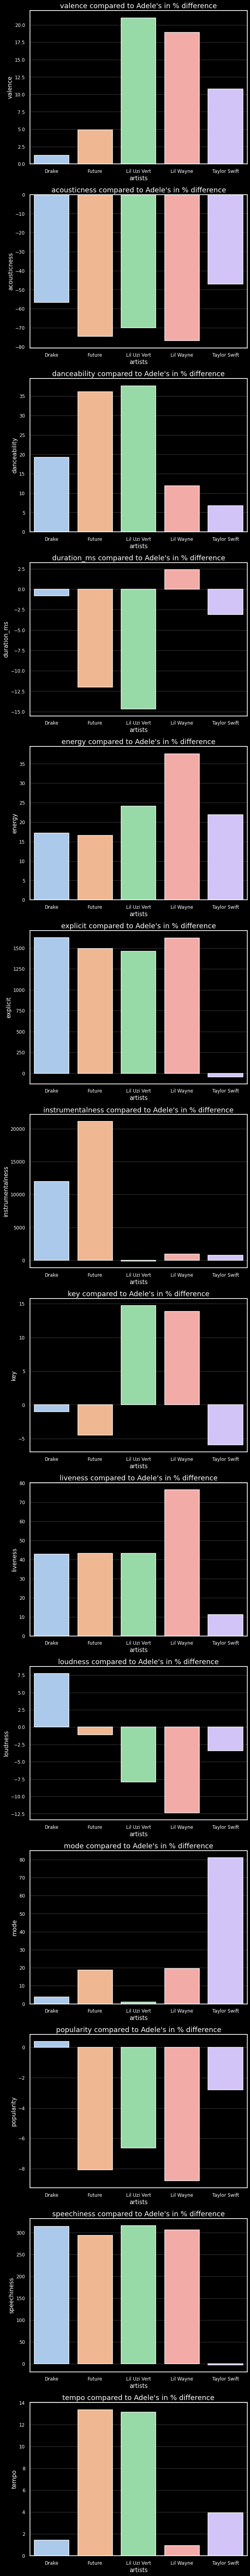

In [36]:
def get_pct_diff(df):
    '''
    Function to get percentage difference between artist features in all rows, and the first row of the dataframe. In other words
    the first row of dataframe should contain features that you are making as the base comparison.
    
    df - dataframe containing features of artists to take differences from
    '''
    temp = df.iloc[:,1:]
    temp = temp.sub(temp[:1].values,axis='columns')
    temp = temp.div(df.iloc[0,1:].values,axis='columns')
    temp = temp *100
    out = pd.concat([df[['artists']],temp],axis=1)
    out.drop(0,axis=0,inplace=True)
    return out


def compare_characteristics_2(df,num = 5):
    '''
    This function plots differences between the top num artists and Adele.
    
    Parameters:
    df - dataframe with the first column being 'year', and the following columns being numerical characteristics
         of the songs.
    '''
    sns.set_palette("pastel")
    fig,ax = plt.subplots(nrows = 14, ncols = 1,figsize = (10,120))
    row = 0
    for name in df.columns[1:]:
        sns.barplot(x = df.artists, y = df[name], ax = ax[row])
        
        ax[row].tick_params(labelsize=12)        
        ax[row].set_title(f"{name} compared to Adele's in % difference")
        
        row+=1;
    fig.show()
    
    
diff_df = get_pct_diff(compare_df)
compare_characteristics_2(diff_df)

Notable comparisons:

1. The top artists' valence,danceability,energy are higher than Adele. Their songs are happier,livelier and in general more upbeat.

2. Top artists' tempo seems to be slightly faster and their modality tends to be more towards a major rather than minor.

3. Top artists' songs contain more words to instrumentals ratio. Aparts from taylor swift, the others are rappers so this is expected.

4. The rappers mostly release songs that are explicit, compared to Adele's songs.

5. Top artists' songs are more live than hers based on the graph. This is probably because most of her songs on Spotify are studio releases, not songs she sings live to an audience.

6. One unexpected finding is that among the top artists, the Adele songs' average popularity is higher than most of them. This means that Adele songs on average are doing relatively well. 


Number 6 further tells us that the reason that Adele isn't in the top 5 based on summed popularity, is not because her songs are not popular, but because she hasn't released as many songs as the other top contenders.


In [37]:
artists = ['Adele','Drake','Future','Lil Uzi Vert','Lil Wayne','Taylor Swift']
counts = []
for a in artists:
    print(a,'has',len(artist_df[artist_df['artists'] == a]),'songs released since 2007.')
    

Adele has 40 songs released since 2007.
Drake has 314 songs released since 2007.
Future has 207 songs released since 2007.
Lil Uzi Vert has 186 songs released since 2007.
Lil Wayne has 238 songs released since 2007.
Taylor Swift has 228 songs released since 2007.


As expected, my guess is right.

Main conclusions for section 3:

1. From here, I can say that Adele is popular and doing well compared to other artists who released songs on 2007 onwards. However, the reason that she isn't within the top 5 is simply because she has less songs than other people.

2. Adele songs contain less words to instrument ratio compared to top contenders, because most of them are rappers. Her songs are also much less explicit


3. Compared to her competitors, her songs are slower, less energetic, less upbeat and somewhat sadder. In other words, the data confirms that she is the queen of slower ballads compared to her top competitors.


In [ ]:
'''popularity_length = data_df.groupby('artists')[['popularity','duration_ms']].agg({'popularity':'sum','duration_ms':'mean'}).sort_values(by = 'popularity',ascending=False)
popularity_length['duration_ms'] = popularity_length['duration_ms'].apply(lambda s : s/60000)
popularity_length.rename(columns ={'duration_ms':'time'},inplace=True)
'''